<a href="https://colab.research.google.com/github/Vishal1711/AuE893-Deep-Learning-Application-in-Engineering/blob/main/AuE8930_Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 4

Welcome to your fourth Mini Project! You will build an RNN model to classify text and an LSTM model for anomaly detection (also outlier detection) on the temperature sensor data. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- TensorFlow 2.x is allowed to implement your models.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.

## Task 1: Text Classification

This task aims to train a sentiment analysis model to classify given sentences as **positive or negative**, based on the Recurrent Neural Network.

---

**Tasks**

1. Load data
    - Load the training data and the test data.
    - Extract labels and texts which are seperated by the string of `" +++$+++ "`.
    - Eliminate index information in the test data so that you can get pure sentences.
    - Print out the first 10 examples of your training set and test set.
2. Preprocess data
    - Tokenize the data and convert the text to sequences.
    - Add padding to ensure that all the sequences have the same shape.
    - **Hint**: click [here](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html) for more information.
3. Build RNN model
    - Build a RNN based on TensorFlow 2.x.
    - Visualize the model using [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).
4. Train model
    - Initialize hyperparameters.
    - Train your model.
    - Visualize the performance including training loss, training accuracy, validation loss, and validation accuracy.
5. Predict
    - Test your model on the test data.
    - Save the predicted results (labels and texts) in a CSV file and submit it to Canvas.


In [31]:
! unzip dataset.zip

Archive:  dataset.zip
replace ambient_temperature_system_failure.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ambient_temperature_system_failure.csv  
  inflating: task1_test_data.txt     
  inflating: task1_training_data.txt  


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU,SimpleRNN
from keras.layers import Dense, Activation, Flatten
from keras import initializers
from tensorflow.keras.optimizers import RMSprop

%matplotlib inline

In [33]:
# Write your code here

# Load Data

# Load Train Data

train_data = []
train_data1 = []
label_data = []
with open("task1_training_data.txt",'r') as file:                     # Read training data from .txt file
    for line in file:
        grade_data = line.strip().split('+++$+++')                    # Extract labels and texts which are seperated by the string of " +++$+++ "
        train_data1.append(grade_data)
    
for x in train_data1:
  y = x[-1]
  l = x[0]
  l = int(l)
  label_data.append(l)
  train_data.append(y)

label_data = np.array(label_data)
print('Train Data:',train_data[0:10])                                  # Print 10 examples of train data


# Load Test Data

import re
test_data = []

with open("task1_test_data.txt",'r') as test_file:                     # Read test data from .txt file
  for line in test_file:
    #test1_data = line.strip().split(' (\d+) ')
    line = line.strip()
    res = re.split('(\d+,)', line)
    res = res[-1]
    test_data.append(res)

test_data = test_data[1:]
print('Test Data:',(test_data[0:10]))            # Print 10 examples of test data



Train Data: [' are wtf ... awww thanks !', ' leavingg to wait for kaysie to arrive myspacin itt for now ilmmthek .!', ' i wish i could go and see duffy when she comes to mamaia romania .', " i know eep ! i can ' t wait for one more day ....", ' so scared and feeling sick . fuck ! hope someone at hr help ... wish it would be wendita or karen .', ' my b day was thurs . i wanted 2 do 5 this weekend for my b day but i guess close enough next weekend . going alone', ' e3 is in the trending topics only just noticed ive been tweeting on my iphone until now', ' where did you get him from i know someone who would love that !', ' dam just got buzzed by another huge fly ! this time it landed on my head ... not impressed', " tomorrowwwwwwwww !!! you ' ll love tomorrow ' s news !"]
Test Data: ['my dog ate our dinner . no , seriously ... he ate it .', 'omg last day sooon n of primary noooooo x im gona be swimming out of school wif the amount of tears am gona cry', "stupid boys .. they ' re so .. stu

In [34]:
# Preprocess Data

num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize the data and convert the text to sequence

# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_data)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(train_data)

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)         # Add padding to ensure that all the sequences have the same shape

# Output the results of our work
print("Word index:\n", word_index)
print("\nTraining sequences:\n", train_sequences[0:10])
print("\nPadded training sequences:\n", train_padded[0:10])
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

# Tokenize our test data

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

print("Testing sequences:\n", test_sequences[0:10])
print("\nPadded testing sequences:\n", test_padded[0:10])
print("\nPadded testing shape:",test_padded.shape)

X = train_padded
train_size = 0.8
split = int((train_size)*len(X))
X_train = X[0:split]
X_valid = X[split:]
y_train = label_data[0:split]
y_valid = label_data[split:]


# print(X_train.shape)
# print(y_train.shape)
# print(X_valid.shape)
# print(y_valid.shape)

# print(X_train[0])
# print(y_train[0])
# print(X_valid[-1])
# print(y_valid[-1])

Word index:
 {'<UNK>': 1, 'i': 2, "'": 3, 'to': 4, 'the': 5, 'a': 6, 'my': 7, 'and': 8, 'it': 9, 'you': 10, 'is': 11, 'for': 12, 'in': 13, 's': 14, 'of': 15, 't': 16, 'on': 17, 'that': 18, 'me': 19, 'so': 20, 'have': 21, 'm': 22, 'but': 23, 'just': 24, 'with': 25, 'be': 26, 'at': 27, 'not': 28, 'was': 29, 'now': 30, 'this': 31, 'can': 32, 'up': 33, 'good': 34, 'day': 35, 'all': 36, 'out': 37, 'get': 38, 'like': 39, 'are': 40, 'no': 41, 'go': 42, 'today': 43, 'do': 44, 'your': 45, 'too': 46, 'going': 47, 'love': 48, 'we': 49, 'work': 50, 'got': 51, 'what': 52, 'lol': 53, 'time': 54, 'from': 55, 'back': 56, 'u': 57, 'one': 58, 'will': 59, 'know': 60, 'im': 61, 'about': 62, 'don': 63, 'really': 64, 'am': 65, 'had': 66, 'see': 67, 'some': 68, 'there': 69, 'its': 70, 'they': 71, 'how': 72, 'if': 73, 'still': 74, 'night': 75, 'well': 76, 'new': 77, '2': 78, 'want': 79, 'think': 80, 'as': 81, 'thanks': 82, 'll': 83, 'home': 84, 'oh': 85, 'when': 86, 'more': 87, 'much': 88, 'he': 89, 'here': 9

In [35]:
print(label_data.shape)
print(train_padded.shape)

(200000,)
(200000, 37)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 250)         250000    
                                                                 
 global_average_pooling1d (G  (None, 250)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 128)               32128     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 290,449
Trainable params: 290,449
Non-trainable params: 0
________________________________________________

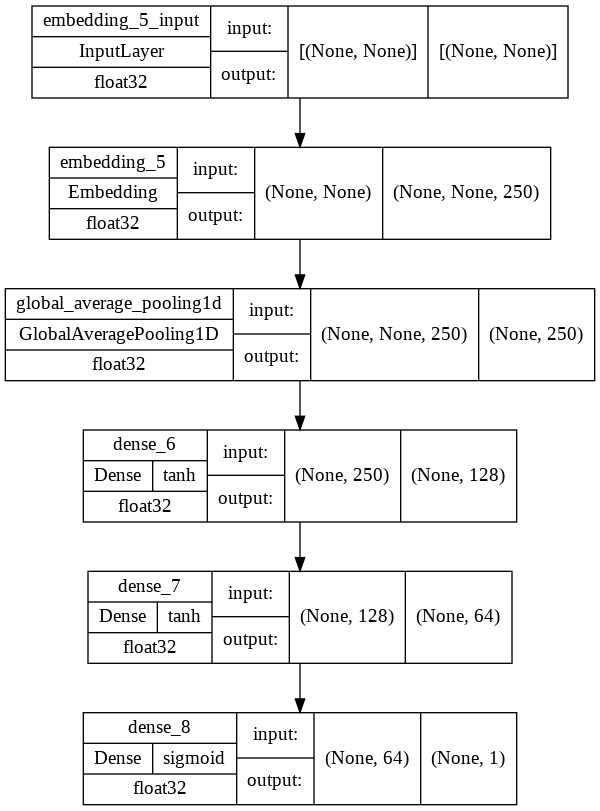

In [36]:
# Build RNN Model

# Build a RNN based on TensorFlow 2.x

# Model 1

def SimpleRNN(num_words,embedded_dims,dense_1,dense_2,loss,optimizer,metrics):

  model = Sequential()
  model.add(Embedding(num_words,embedded_dims))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(Dense_1,activation='tanh'))
  model.add(Dense(64,activation='tanh'))
  model.add(Dense(Dense_2,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  return model

print(model.summary())


# Model 2

# In below model training and validation loss is large

# model = Sequential()
# model.add(Embedding(num_words, 256))
# model.add(SimpleRNN(128, input_shape=(X_train.shape), return_sequences=True, activation='tanh')) 
# model.add(SimpleRNN(64, activation='tanh')) 
# model.add(Dense(1, activation='sigmoid'))
# opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=3, batch_size=256, validation_data=(X_valid, y_valid))



# Visualize the model using tf.keras.utils.plot_model.

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)


Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 0.5341 - accuracy: 0.7346 - val_loss: 0.5071 - val_accuracy: 0.7584
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 0.5020 - accuracy: 0.7588 - val_loss: 0.5021 - val_accuracy: 0.7559
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 0.4894 - accuracy: 0.7638 - val_loss: 0.4883 - val_accuracy: 0.7627
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.4834 - accuracy: 0.7672 - val_loss: 0.4875 - val_accuracy: 0.7642
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 0.4808 - accuracy: 0.7681 - val_loss: 0.4872 - val_accuracy: 0.7650
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.4787 - accuracy: 0.7697 - val_loss: 0.4900 - val_accuracy: 0.7618
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.4765 - accuracy: 0.7707 - val_loss: 0.4892 - val_accuracy:

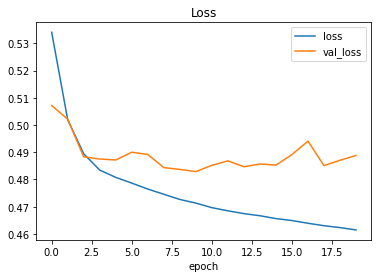

Text(0.5, 0, 'epoch')

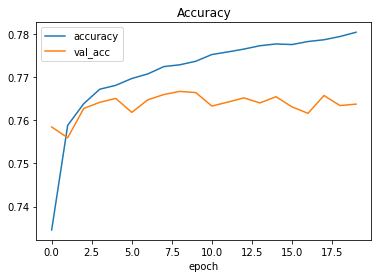

In [37]:
# Train Model

# Initialize hyperparameters

Dense_1 = 128
Dense_2 = 1
embedded_dims = 250
num_words = 1000
loss='binary_crossentropy'
optimizer='rmsprop'
metrics=['accuracy']
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Train the model
model = SimpleRNN(num_words,embedded_dims,Dense_1,Dense_2,loss,optimizer,metrics)
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_valid, y_valid))

# Visualize the performance

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')



In [38]:
# Predict

# Test model on the test data

pred= model.predict(test_padded)

# Convert model prediction in 0 , 1 by giving threshold

predi =[]
for x in pred:
  if x>=0.5:
    y=1
    x=str(x)
    predi.append(y)
  else:
    y=0
    x=str(x)
    predi.append(y)
    
print(predi)
res = pd.DataFrame(predi)

#res.index = test_data.index # its important for comparison
res.columns = ["prediction"]

# Save the predicted results in CSV file

res.to_csv("prediction_results.csv")

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 

## Task 2: Anomaly Detection

In manufacturing industries, the anomaly detection technique is applied to predict the abnormal activities of machines based on the data read from sensors. In machine learning and data mining, anomaly detection is the task of identifying the rare items, events, or observations that are suspicious and seem different from the majority of the data. In this task, you will predict the possible failure of the system based on the temperature data. And this failure can be detected by check if they follow the trend of the majority of the data.

---

**Dataset**

The given dataset (`ambient_temperature_system_failure.csv`) is a part of Numenta Anomaly Benchmark (NAB) dataset, which is a novel benchmark for evaluating machine learning algorithms in anomaly detection.

**Tasks**

Because the labels have not been given, you will need to use a LSTM based model to capture the trend of the feature for majority of the data. First, extract $n_x$ features from each of the raw data point. Second, create a sliding window with length $l$. Third, fomulate LSTM taking a matrix of shape $l \times n_x$ as the input to predict the temperature value of the next time step $l+1$. Last, compare the predicted result and the real data and find out abnormal points where the difference between these two values are larger than the threshold. 

For instance, if we want to extract 3 features ($n_x=3$), and set the sliding window length to 100 ($l=100$). Then LSTM will take the first 100 (e.g., $[0:100]$) time step data as the input to predict the temperature value of the next time step (e.g., 100). The shape of the input will be $100 \times 3$, and shape of the output will be a single number.

1. Load data
    - Read the CSV file.
    - Draw a curve to visualize the time-series data.
2. Preprocess data
    - The raw data of temperature is the degree Fahrenheit, you will need to convert it into degree Celcius.
    - Use Pandas package convert string timestamp data into the datatime data. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for details.
3. Feature Engineering
    - We will use datatime data to generate four features: hours, day or night, day of the week, weekday or weekends.
    - Hour: convert datetime data into hours. The result of your processed data will be [0, 1, 2, ..., 22, 23, 0, 1, ..., 22, 23]. Check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html).
    - Day or night: this will be a binary data. 7:00-22:00 will be day time, the rest will be night.
    - Day of the week: convert datetime data into day of the week. The result of your processed data will be [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6 ...]. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html) for more information.
    - Workday or weekend: this will be a binary data. Monday to Friday will be workdays, Saturday and Sunday are weekend.
    
4. Prepare training and testing data
    - Split the dataset into training set and test set.
    - Min-max normalization.
    - Generate sliding window (similar to the last task of HW1) data.
3. Build LSTM model
    - Build an LSTM model using TensorFlow 2.x.
    - Visualize your model.
4. Train model
    - Initialize hyperparameters.
    - Train the model.
    - Evaluate the trained model on the test data.
    - Visualize the performance including training loss and test loss.
5. Find anomalies
    - Specify the threshold and predict anomalies on testing dataset.
    - Visualize the anomalies.


In [65]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
import plotly.graph_objects as go

In [66]:
# Write you code here

# Load the data

# Read CSV File

df = pd.read_csv('ambient_temperature_system_failure.csv')

# Draw a curve to visualize the time-series data

fig = px.line(df, x = 'timestamp', y = 'value', title='Plot of Timeseries Data')
fig.show()

In [67]:
# Preprocess Data

# The raw data of temperature is the degree Fahrenheit, convert it into degree Celcius

df1 = df.iloc[:,1]
celcius = []

df['value'] = (df['value'] - 32) * 5/9

# Use pandas package convert string timestamp into datatime data

#df = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

df['timestamp'] = pd.to_datetime(df['timestamp'])


In [68]:
# Feature Engineering

# Convert datetime data into hours

df['hours'] = df['timestamp'].dt.hour

# 7:00-22:00 will be day time, the rest will be night

# shift = pd.to_datetime(df,unit='s').apply(lambda x: "Day" if x.hour >= 7 and x.hour <= 22 else "Night")
df['shift'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

# Day of the week: convert datetime data into day of the week

df['DayofWeek'] = df['timestamp'].dt.dayofweek
# day_of_week = df.dt.weekday

# Workday or weekend: this will be a binary data

df['WeekDay'] = (df['DayofWeek'] < 5).astype(int)
# shift = day_of_week.apply(lambda x: "Weekdays" if x >=0  and x <= 4 else "Weekends")


In [69]:
# Prepare training and testing data

# Split the dataset into training set and test set

data = df[['value', 'hours', 'shift', 'DayofWeek', 'WeekDay']]

# Min-max normalization

scaler = MinMaxScaler()
scaler = scaler.fit(data[['value', 'hours', 'shift', 'DayofWeek', 'WeekDay']])

data[['value', 'hours', 'shift', 'DayofWeek', 'WeekDay']] = scaler.transform(data[['value', 'hours', 'shift', 'DayofWeek', 'WeekDay']])
# data = pd.DataFrame(data)

prediction_time = 1 
testdatasize = 1000
unroll_length = 50
testdatacut = testdatasize + unroll_length  + 1

#Training data
x_train = data[0:-prediction_time-testdatacut].values
y_train = data[prediction_time:-testdatacut  ].values
y_train = y_train[:,0]

#Test data
x_test = data[0-testdatacut:-prediction_time].values
y_test = data[prediction_time-testdatacut:  ].values
y_test = y_test[:,0]

# Generate siding window

def sliding(data,sequence_length=24):
  result = []
  for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
  return np.asarray(result)

#Adapt the datasets for the sequence data shape
x_train = sliding(x_train,unroll_length)
x_test  = sliding(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]


#Shape of the data
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)




x_train (6165, 50, 5)
y_train (6165,)
x_test (1000, 50, 5)
y_test (1000,)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 128)         68608     
                                                                 
 dropout_6 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 100)               91600     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 160,309
Trainable params: 160,309
Non-t

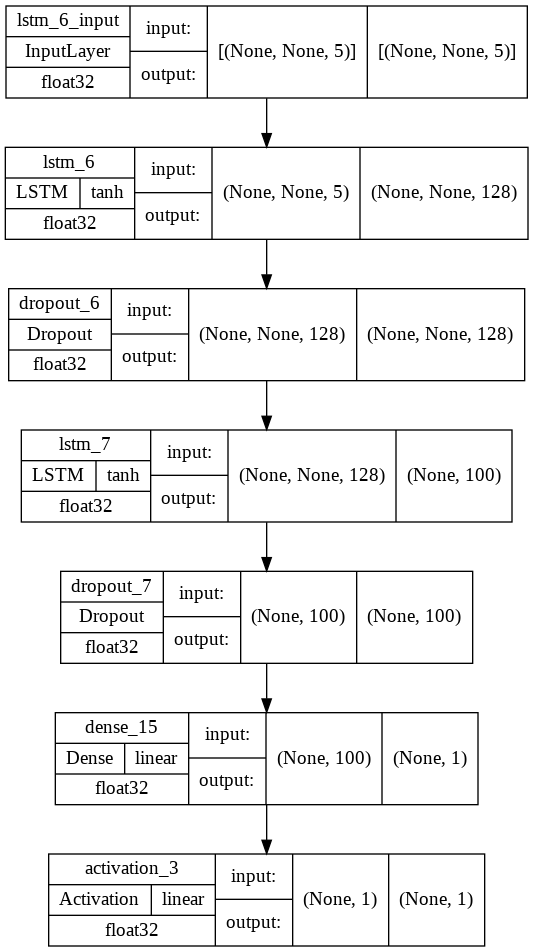

In [70]:
# Build LSTM model

# Build an LSTM model using TensorFlow 2.x

model = Sequential()
model.add(LSTM(128, input_dim=x_train.shape[-1],return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mae')

print(model.summary())

# Visualize your model

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)


Epoch 1/45
3/3 [==============================] - 13s 3s/step - loss: 0.2287 - val_loss: 0.2235
Epoch 2/45
3/3 [==============================] - 9s 3s/step - loss: 0.1168 - val_loss: 0.0799
Epoch 3/45
3/3 [==============================] - 9s 3s/step - loss: 0.1124 - val_loss: 0.1720
Epoch 4/45
3/3 [==============================] - 9s 3s/step - loss: 0.1020 - val_loss: 0.1512
Epoch 5/45
3/3 [==============================] - 9s 3s/step - loss: 0.0831 - val_loss: 0.0773
Epoch 6/45
3/3 [==============================] - 9s 3s/step - loss: 0.0840 - val_loss: 0.1124
Epoch 7/45
3/3 [==============================] - 10s 3s/step - loss: 0.0736 - val_loss: 0.1120
Epoch 8/45
3/3 [==============================] - 9s 3s/step - loss: 0.0642 - val_loss: 0.0564
Epoch 9/45
3/3 [==============================] - 9s 3s/step - loss: 0.0612 - val_loss: 0.0823
Epoch 10/45
3/3 [==============================] - 9s 3s/step - loss: 0.0574 - val_loss: 0.0476
Epoch 11/45
3/3 [==============================

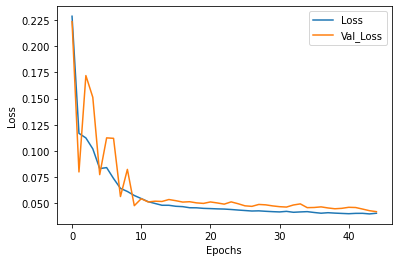

In [71]:
# Train model

# Initialize hyperparameters

model.compile(optimizer='adam', loss='mae')

# Train the model

model.fit(x_train, y_train, batch_size=2048, epochs=45, validation_split=0.1)

#Visualizing training and validaton loss

plt.plot(model.history.history['loss'], label = 'Loss')
plt.plot(model.history.history['val_loss'], Label = 'Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

# Evaluate the trained model on the test data
results = model.evaluate(x_test, y_test, batch_size=28)
print('Evaluation of model on test data',results)

Reconstruction error threshold: 0.7939518901964588


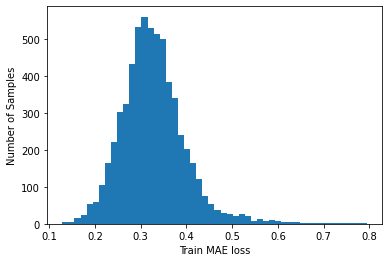

In [72]:
# Train Loss

X_train_pred = model.predict(x_train, verbose=0)
x_train = x_train[:,0]
train_mae_loss = np.mean(np.abs(X_train_pred - x_train), axis=1)

# Plotting of train loss

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# If the reconstruction loss for a data point in the test set is greater than this reconstruction error threshold value then we will label this data point as an anomaly
 
threshold = np.max(train_mae_loss)                                              # Specify the threshold
print(f'Reconstruction error threshold: {threshold}')

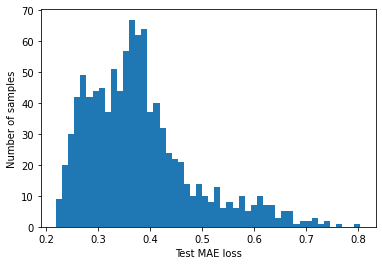

In [73]:
# Test Loss

X_test_pred = model.predict(x_test, verbose=0)
x_test = x_test[:,0]
test_mae_loss = np.mean(np.abs(X_test_pred-x_test), axis=1)

# Plotting of test loss

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [74]:
# Find Anamolies

# Specify the threshold and predict anomalies on testing dataset

TIME_STEPS=0
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)
test_score_df = pd.DataFrame(x_test[TIME_STEPS:])

threshold = 0.6                      # Selected threshold manually from observation


test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['value'] = x_test[TIME_STEPS:,0]
test_score_df['time_epoch'] = df['time_epoch']


fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time_epoch'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=df['time_epoch'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



(51, 10)


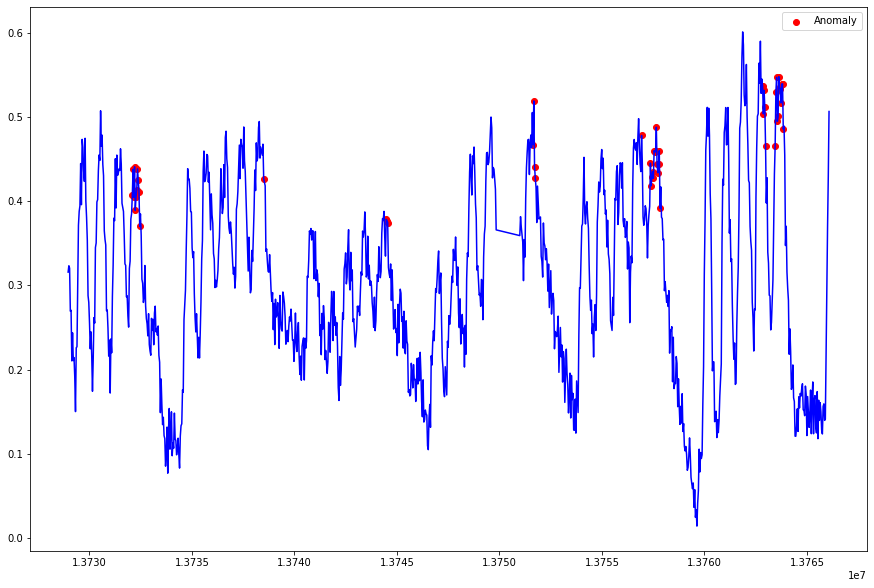

In [75]:
# Visualize the anomalies

anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
print(anomalies.shape)


#Visualizing anomalies (Red Dots)

plt.figure(figsize=(15,10))
a = test_score_df.loc[test_score_df['anomaly'] == True, ['time_epoch','value']]
# print(a)
# a = df.loc[df['anomaly'] == 1, ['time_epoch', 'value']] #anomaly
plt.plot(test_score_df['time_epoch'], test_score_df['value'], color='blue')
plt.scatter(a['time_epoch'],a['value'], color='red', label = 'Anomaly')
plt.legend()